## Population Basics


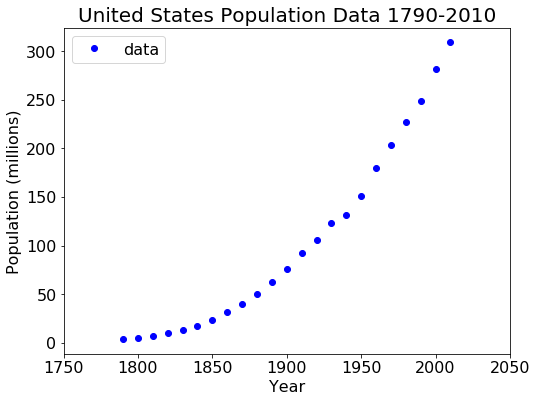

[ -8.20284611e-05   2.80572386e-02]


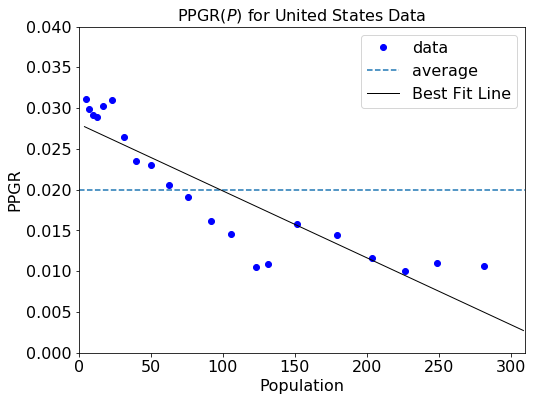

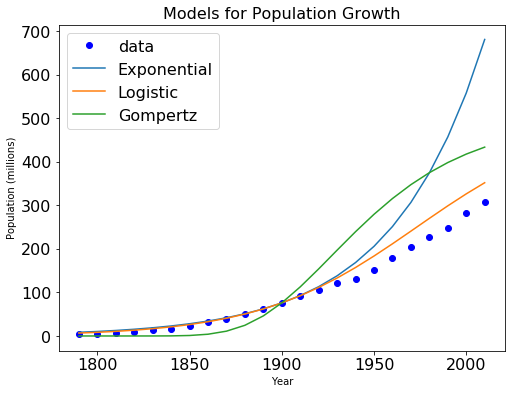

In [7]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#--------------------------------------------------
# Read and scale US Population Data.
#--------------------------------------------------
CensusFile = open('USPopulation.csv', 'r') #Don't you dare overwrite this file!
N = 23 # number of data points
i = 0
j = 0
USYears = np.zeros([N], dtype=int)
USPop0 = np.zeros([N], dtype=int)
for line in CensusFile:
    if i == 0 or i==1:
        i=i+1
    else:
        values = line.split(',')
        USYears[j] = int(values[0])
        USPop0[j] = int(values[1])
        j = j+1
        i = i+1

CensusFile.close()
USPop = USPop0/1.e6 #population as a floating point number in millions

plt.figure(figsize=(8,6))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
#
plt.plot(USYears, USPop, 'o', color='b', label='data')
plt.ylabel('Population (millions)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('United States Population Data 1790-2010', fontsize=20)
plt.legend(loc=2, fontsize=16)
plt.xlim([1750, 2050])
plt.savefig('USPopData.png')
plt.show()
plt.close()

#Declare the array to store my PPGR values
M = N-2 #number of data points
PPGR = np.zeros([M])

#This for loop will find the PPGR between any two points with one point between them.
for k in range(21):
    PPGR[k] =  (1/USPop[k+1])*((USPop[k+2]-USPop[k])/(USYears[k+2]-USYears[k]))
    k = k+1

avgPPGR = np.average(PPGR)

#Time to start making the best fit line. First we will use np.polyfit to find the slope and y-intercept of the line
USPopLineCoef = np.polyfit(USPop[1:N-1],PPGR,1)
print (USPopLineCoef)
#Next, I will use the values of USPop as my x-values for a function of the best fit line
USPopLine = USPopLineCoef[0]*USPop + USPopLineCoef[1]

#PPGR graph: First is the points, second is the mean, third is the best fit line
plt.figure(figsize=(8,6))

#
plt.plot(USPop[1:N-1], PPGR, 'o', color='b', label='data')
plt.plot([0,310],[avgPPGR,avgPPGR], linestyle='--', label='average')
plt.plot(USPop,USPopLine,color='k', linewidth=1, label='Best Fit Line')
plt.ylabel('PPGR', fontsize=16)
plt.xlabel('Population', fontsize=16)
plt.title('PPGR($P$) for United States Data', fontsize=16)
plt.legend(loc=1, fontsize=16)
plt.xlim([0, 310])
plt.ylim([0.000,0.040])
plt.savefig('USPPGRGraph.png')
plt.show()
plt.close()

"""Now that I have both the population graph and the PPGR graph, I want to begin looking at the different types of
equations that could be used to model population growth. As of 10/15/2017 I will be looking at all three models: exponential,
logistic, and Gompertz"""
#Exponential model
def US_exp(t,P0,r):
    P = P0*np.exp(r*t)
    return P

"""There are a few issues that arise when using the Logistic and Gompertz models. First and foremost, in those two models
r does not equal PPGR. Therefore, the following is the method by which I will be finding the R value, given the average PPGR
as calculated earlier.

Since we want the growth rate to approach 'r' as population approaches 0, and we want growth rate to approach '0' as population
approaches L, we can create the following linear relationship:

PPGR-r=-(r/L)(P-0)

Solving for 'r', we obtain:

PPGR/(-(P/L)+1) = r

We will use this value when attempting to use 'r' in the following models"""

#Logistic Model
def US_log(t,P0,L):
    r = avgPPGR/(-(P0/L)+1)
    A = ((L-P0)/P0)
    T = L
    B = 1 + A*np.exp(-r*t)
    return T/B
              
#Gompertz Model
def US_Gomp(t,P0,L):
    r = avgPPGR/(-(P0/L)+1)
    log = np.log(L/P0)
    exp = -log*np.exp(-r*t)
    return L*np.exp(exp)

#I will next set a value for the limit of growth in the US. At present, this value is arbitrary.
#Hopefully I will be able to find a better value for this later.

L = 500

"""For the sake of experimentation, the following is a test of the defined function above. Delete these three quotation
marks and the ones from the documentation below in order to comment it out."""
plt.figure(figsize=(8,6))
#
#First, the data
plt.plot(USYears, USPop, 'o', color='b', label='data')
#Next, the possible exponential function
plt.plot(USYears, US_exp(USYears-1900,USPop[11],avgPPGR), label='Exponential')
#A possible logistic model
plt.plot(USYears, US_log(USYears-1900,USPop[11],L), label = 'Logistic')
#and finally a possible Gompertz model
plt.plot(USYears, US_Gomp(USYears-1900,USPop[11],L), label = 'Gompertz')
plt.legend(loc=2, fontsize=16)
plt.title('Models for Population Growth', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.savefig('USModelsFirst.png')
plt.show()
plt.close()

#Remove the pound to comment out the above plot"""
